In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from similarity_searching_sketches.caffe_vector_reader import CaffeVectorsIterator
from similarity_searching_sketches.distances import get_sample_distances
from similarity_searching_sketches.persistence import save_np_array
from similarity_searching_sketches.visualization import hist_array

#### Experiment configuration

In [2]:
DATA_FOLDER='/home/matej/data/sketch-testing/devel/'
CAFFE_VECTORS_PATH='/home/matej/data/sketch-testing/profi-neuralnet-100K.data' #caffe vectors file 
TRAIN_SET_SAVE_PATH=DATA_FOLDER+'train_set.npy' #persist train dataset to
TEST_SET_SAVE_PATH=DATA_FOLDER+'test_set.npy' #persist test dataset to
DATA_SAMPLE_SIZE=2000 #number of samples to read
PORTION_TEST_SET=0.2 #portion of samples in test set
N_DIST_DISTR_REF_OBJ=200 #how many reference objects to use for distance distribution estimation
LOG_BY=500

#### Read raw data



In [3]:
iterator=CaffeVectorsIterator(CAFFE_VECTORS_PATH, DATA_SAMPLE_SIZE,allow_duplicities=False)

In [4]:
_, decaf_vecs=zip(*list(iterator))
decaf_vecs=np.array(decaf_vecs)

#### Shape of vectors (n_samples, n_features)

In [5]:
decaf_vecs.shape

(2000, 4096)

#### Shuffle vectors

In [6]:
np.random.shuffle(decaf_vecs)

#### Train/test split

In [7]:
training_set, test_set=train_test_split(decaf_vecs,test_size=PORTION_TEST_SET)

In [8]:
training_set.shape

(1600, 4096)

In [9]:
test_set.shape

(400, 4096)

#### Persist 

In [10]:
save_np_array(TRAIN_SET_SAVE_PATH, training_set)
save_np_array(TEST_SET_SAVE_PATH, test_set)

#### Analysis of distance distribution

In [11]:
distances_l1, distances_l2 = get_sample_distances(vec_matrix=training_set, sample_size=N_DIST_DISTR_REF_OBJ, p=[1,2], log_by=LOG_BY)


INFO:Going to compute distances from selected 200 reference objects to all 1400 other objects in given matrix for p=[1, 2].
INFO:IterationLogger| Started iteration no.: 500
 Time from previous iteration: 5.197357177734375s
 Time from start: 5.19735860824585s
INFO:IterationLogger| Started iteration no.: 1000
 Time from previous iteration: 5.138963222503662s
 Time from start: 10.336324691772461s


#### Distance distribution Minkowski L1

In [19]:
pd.DataFrame(distances_l1).describe()

,0
count,280000.000000
mean,2516.984430
std,328.923647
min,573.861023
25%,2305.235962
50%,2531.252441
75%,2739.238342
max,3806.604980


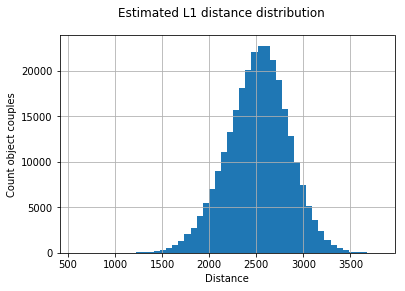

In [20]:
hist_array(distances_l1, bins=50, title='L1 distance distribution', xlabel='Distance', ylabel='Count object couples')

#### Distance distribution Minkowski L2

In [21]:
pd.DataFrame(distances_l2).describe()

,0
count,280000.000000
mean,81.298125
std,10.721388
min,20.189997
25%,74.099199
50%,80.907784
75%,88.013323
max,138.271408


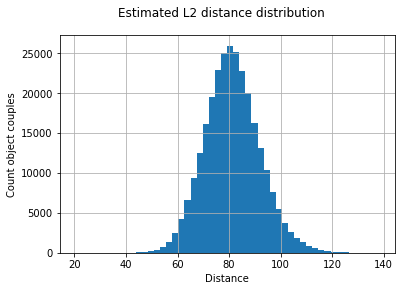

In [22]:
hist_array(distances_l2, bins=50, title='L2 distance distribution', xlabel='Distance', ylabel='Count object couples')